In [1]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import time
import pandas as pd
import sklearn as sk

## Temps du temps de training et de la RMSE en fonction de la taille du dataset

Il s'agit d'un test boîte blanche sur un model sinusoïdale, et on observe l'évélotuion du temps de training et la RMSE en fonction de la taille du dataset

In [4]:
nmin = 10
nmax = 10000
ndataset = 30

datasets = np.logspace(np.log10(nmin),np.log10(nmax), ndataset)
datasets = np.sort(list(set([int(round(i)) for i in datasets]))) 

print(datasets)

[   10    13    16    20    26    33    42    53    67    85   108   137
   174   221   281   356   452   574   728   924  1172  1487  1887  2395
  3039  3857  4894  6210  7880 10000]


In [9]:
tt = []
tp = []
e = []

In [6]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [10]:
i = 0
for n in datasets:
    X = np.linspace(0, 4*np.pi, n).reshape(-1, 1) 
    Y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)
    
    # Création du modèle de régression Gaussienne avec GPflow
    k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
    model = gpflow.models.GPR(data=(X, Y), kernel=k)  # Modèle de régression
    
    # Entraînement du modèle
    start_time = time.time()
    opt = gpflow.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)
    training_time = time.time() - start_time
    tt.append(training_time)
    
    # Prédiction sur des nouvelles données
    X_new = np.linspace(0, 4*np.pi, 2000).reshape(-1, 1)
    start_time = time.time()
    mean, var = model.predict_f(X_new)  # Prédiction des moyennes et variances
    prediction_time = time.time() - start_time
    tp.append(prediction_time)
    
    #rmse
    y_true = np.sin(X_new)
    e.append(rmse(y_true,mean))
    i += 1
    print(f"{i} sur 30")
    

1 sur 30
2 sur 30
3 sur 30
4 sur 30
5 sur 30
6 sur 30
7 sur 30
8 sur 30
9 sur 30
10 sur 30
11 sur 30
12 sur 30
13 sur 30
14 sur 30
15 sur 30
16 sur 30
17 sur 30
18 sur 30
19 sur 30
20 sur 30
21 sur 30
22 sur 30
23 sur 30
24 sur 30
25 sur 30
26 sur 30
27 sur 30
28 sur 30


KeyboardInterrupt: 

In [16]:
datasets = datasets[:28]

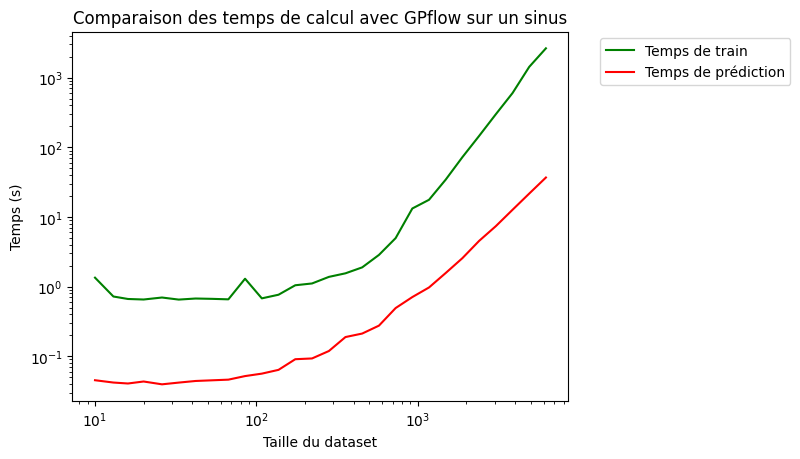

In [17]:
 # Visualisation des résultats
plt.loglog(datasets, tt, label='Temps de train', color='green')
plt.loglog(datasets, tp, label='Temps de prédiction', color='red')

plt.xlabel('Taille du dataset')
plt.ylabel('Temps (s)')

plt.title("Comparaison des temps de calcul avec GPflow sur un sinus")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.show()

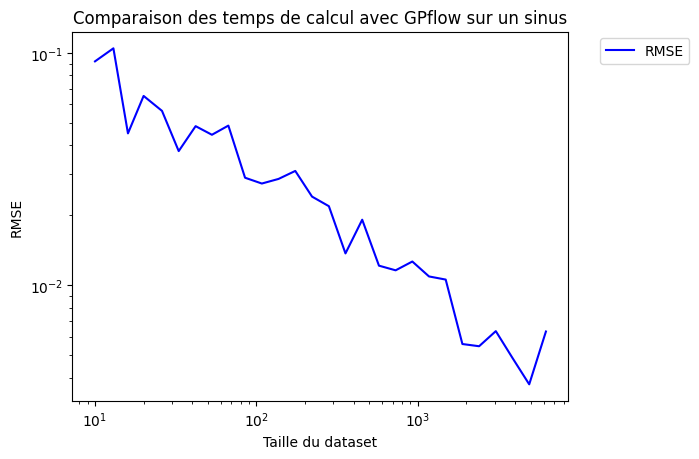

In [19]:
 # Visualisation des résultats
plt.loglog(datasets, e, label='RMSE', color='blue')

plt.xlabel('Taille du dataset')
plt.ylabel('RMSE')

plt.title("Comparaison des temps de calcul avec GPflow sur un sinus")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.show()

## Inducting Point - Temps de training et de la RMSE en fonction de la taille du dataset

On fait la même chose que précédemment mais on approxime le problème avec m points induits (m qui vaut 10% de n) choisit de manière random

In [19]:
nmin = 10
nmax = 100000
ndataset = 100

datasets = np.logspace(np.log10(nmin),np.log10(nmax), ndataset)
datasets = np.sort(list(set([int(round(i)) for i in datasets]))) 

print(datasets)

[    10     11     12     13     15     16     17     19     21     23
     25     28     31     34     37     40     44     49     53     59
     64     71     77     85     93    102    112    123    135    148
    163    179    196    215    236    260    285    313    343    376
    413    453    498    546    599    658    722    792    870    955
   1048   1150   1262   1385   1520   1668   1831   2009   2205   2420
   2656   2915   3199   3511   3854   4229   4642   5094   5591   6136
   6734   7391   8111   8902   9770  10723  11768  12915  14175  15557
  17074  18738  20565  22570  24771  27186  29836  32745  35938  39442
  43288  47508  52140  57224  62803  68926  75646  83022  91116 100000]


In [20]:
tti = []
tpi = []
ei = []

In [21]:
rng = np.random.default_rng(1234)
for n in datasets:
    m = int(n/10)
    X = np.linspace(0, 4*np.pi, n).reshape(-1, 1) 
    Y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)
    
    # Sélection aléatoire de m inducing points parmi X
    inducing_variable = rng.choice(X, size=m, replace=False)
    
    # Création du modèle de régression Gaussienne avec GPflow
    k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
    model = gpflow.models.SGPR(
        data=(X, Y),
        kernel=k,
        inducing_variable=inducing_variable
    )
    
    # Entraînement du modèle
    start_time = time.time()
    opt = gpflow.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)
    training_time = time.time() - start_time
    tti.append(training_time)
    
    # Prédiction sur des nouvelles données
    X_new = np.linspace(0, 4*np.pi, 2000).reshape(-1, 1)
    start_time = time.time()
    mean, var = model.predict_f(X_new)  # Prédiction des moyennes et variances
    prediction_time = time.time() - start_time
    tpi.append(prediction_time)
    
    #rmse
    y_true = np.sin(X_new)
    ei.append(rmse(y_true,mean))
    

KeyboardInterrupt: 

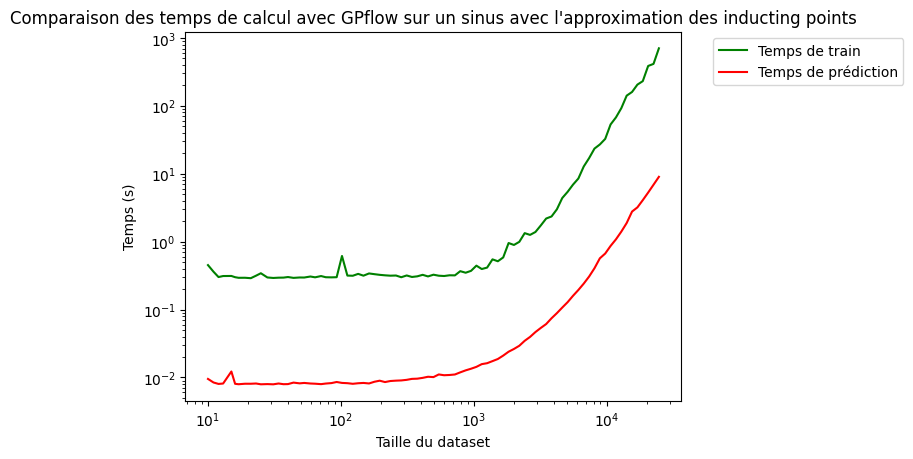

In [28]:
 # Visualisation des résultats
plt.loglog(datasets, tti, label='Temps de train', color='green')
plt.loglog(datasets, tpi, label='Temps de prédiction', color='red')

plt.xlabel('Taille du dataset')
plt.ylabel('Temps (s)')

plt.title("Comparaison des temps de calcul avec GPflow sur un sinus avec l'approximation des inducting points")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.show()

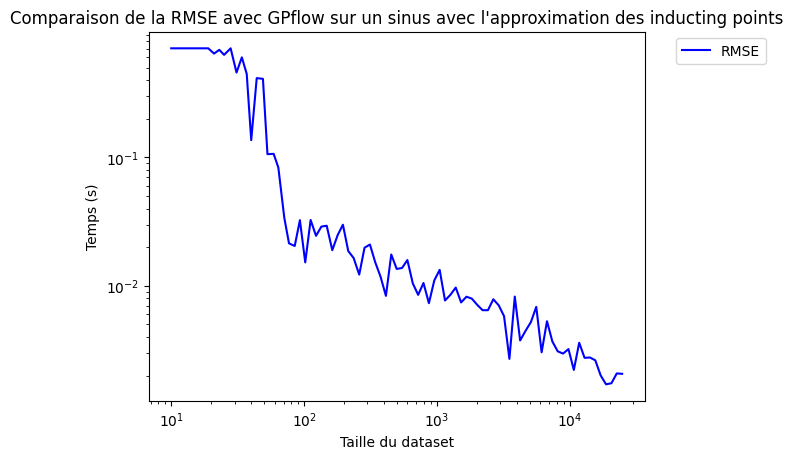

In [29]:
 # Visualisation des résultats
plt.loglog(datasets, ei, label='RMSE', color='blue')

plt.xlabel('Taille du dataset')
plt.ylabel('RMSE')

plt.title("Comparaison de la RMSE avec GPflow sur un sinus avec l'approximation des inducting points")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.show()

## Variation du nombre de points induits

In [20]:
tti = []
tpi= []
ei = []

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

rng = np.random.default_rng(1234)
for m in range(10,110,10):
    n = 3000
    X = np.linspace(0, 4*np.pi, n).reshape(-1, 1) 
    Y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)
    
    # Sélection aléatoire de m inducing points parmi X
    inducing_variable = rng.choice(X, size=int(m/100*n), replace=False)
    
    # Création du modèle de régression Gaussienne avec GPflow
    k = gpflow.kernels.RBF()  # Choix d'un noyau RBF
    model = gpflow.models.SGPR(
        data=(X, Y),
        kernel=k,
        inducing_variable=inducing_variable
    )
    
    # Entraînement du modèle
    start_time = time.time()
    opt = gpflow.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)
    training_time = time.time() - start_time
    tti.append(training_time)
    
    # Prédiction sur des nouvelles données
    X_new = np.linspace(0, 4*np.pi, 2000).reshape(-1, 1)
    start_time = time.time()
    mean, var = model.predict_f(X_new)  # Prédiction des moyennes et variances
    prediction_time = time.time() - start_time
    tpi.append(prediction_time)
    
    #rmse
    y_true = np.sin(X_new)
    ei.append(rmse(y_true,mean))

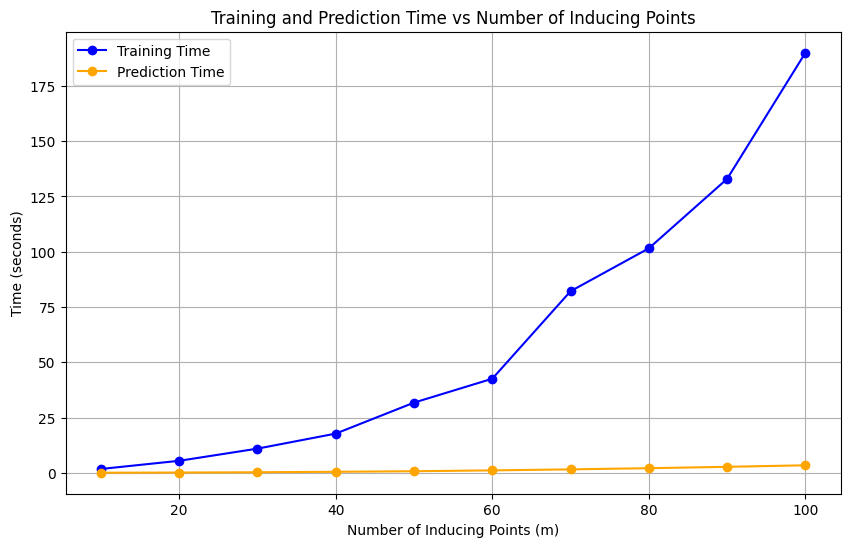

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(range(10, 110, 10), tti, label="Training Time", marker='o', color='blue')

plt.plot(range(10, 110, 10), tpi, label="Prediction Time", marker='o', color='orange')

plt.title("Training and Prediction Time vs Number of Inducing Points")
plt.xlabel("Number of Inducing Points (m)")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()


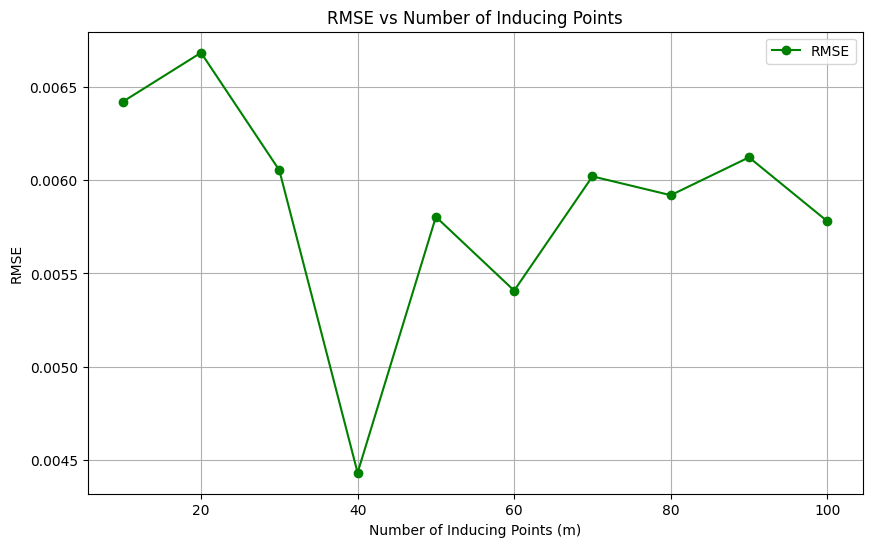

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(range(10, 110, 10), ei, label="RMSE", marker='o', color='green')

plt.title("RMSE vs Number of Inducing Points")
plt.xlabel("Number of Inducing Points (m)")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()
